# Univariate Linear Regression

The data (X1, X2, X3, X4, X5, X6, X7) are for each city.

X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [3]:
crime_df = crime_df[['X1','X3']]
crime_df.columns = ['crime_rate_mil','police_funding']
X = np.array(crime_df['police_funding']).reshape(-1,1)
y=np.array(crime_df['crime_rate_mil']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

In [4]:
from sklearn.linear_model import LinearRegression

regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = regression_df.predict(X_test)

In [6]:
accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

0.06429846490736668


In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.06429846490736668

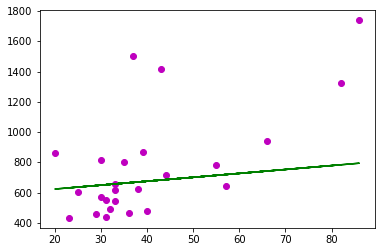

In [8]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='g')
plt.show()

# KNN 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 1]


In [22]:
print(knn.score(X_test, y_test))

0.7421875


In [12]:
#13 = 0.7083333333333334

In [13]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Predicted_Outcome']= y_predicted.tolist()
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()

diabetes_pred_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted_Outcome,Actual_Outcome
379,-0.864263,0.450713,0.213528,1.774927,0.945476,0.677477,-0.214298,-0.811966,0,0
380,0.024693,0.243297,0.901596,-0.077674,1.471088,0.359173,-0.715342,-0.893269,0,0
381,-0.271626,0.243297,-0.359862,0.478106,0.236696,-0.844846,-0.751131,-0.486756,0,1
382,2.691563,0.954438,1.016274,0.972133,0.435791,1.120335,2.097066,0.407571,1,0
383,1.209969,-1.386400,-0.015828,1.157393,-0.288917,0.386852,0.698318,0.407571,1,0


In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[216,  34],
       [ 67,  67]], dtype=int64)

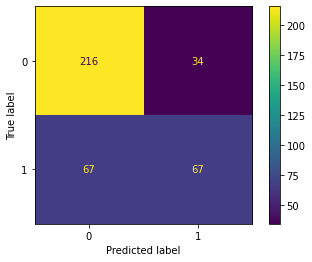

In [15]:
plot_confusion_matrix(knn, X_test, y_test)

In [16]:
# How do we go from the confusion matrix to an accuracy number? 
(227+44)/(227+44 + 90+23)

0.7057291666666666